In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
dataset = pd.read_csv("bright_automotive_company.csv")


In [3]:
dataset.head()

Age  Gender Profession Marital_status      Education No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                4   
1   53   Femal   Salaried        Married  Post Graduate                4   
2   53  Female   Salaried        Married  Post Graduate                3   
3   53  Female   Salaried        Married       Graduate                ?   
4   53    Male        NaN        Married  Post Graduate                3   

  Personal_loan House_loan Partner_working   Salary  Partner_salary  \
0            No         No             Yes  99300.0         70700.0   
1           Yes         No             Yes  95500.0         70300.0   
2            No         No             Yes  97300.0         60700.0   
3           Yes         No             Yes  72500.0         70300.0   
4            No         No             Yes  79700.0         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000    ?  
4        139900  57000  SUV

- The 3rd row contains a "?" inconsistent value.
- By seeing the top 5 records I can say there is inconsistency in data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1586 non-null   int64  
 1   Gender            1533 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1586 non-null   object 
 4   Education         1586 non-null   object 
 5   No_of_Dependents  1586 non-null   object 
 6   Personal_loan     1586 non-null   object 
 7   House_loan        1586 non-null   object 
 8   Partner_working   1586 non-null   object 
 9   Salary            1573 non-null   float64
 10  Partner_salary    1480 non-null   float64
 11  Total_salary      1586 non-null   int64  
 12  Price             1586 non-null   int64  
 13  Make              1586 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.6+ KB


- The data contains 1586 rows and 14 columns
- Some of the columns contains missing values

In [5]:
dataset.describe()

Age        Salary  Partner_salary   Total_salary          Price
count  1586.000000   1573.000000     1480.000000    1586.000000    1586.000000
mean     32.018916  60340.368722    20348.513514   79806.431274   36006.972257
std       8.778502  14656.106826    19655.841385   25707.764534   21168.286950
min      14.000000  30000.000000        0.000000   30000.000000      58.000000
25%      25.000000  51900.000000        0.000000   60500.000000   25000.000000
50%      29.000000  59500.000000    25700.000000   78050.000000   31000.000000
75%      38.000000  71800.000000    38300.000000   95975.000000   47000.000000
max     120.000000  99300.000000    80500.000000  171000.000000  680000.000000

- There is one underage person (Min Age -> 14)
- There is one overage person (Max Age -> 120)

In [50]:
df = dataset
df[df['Age']<=18]

Age Gender Profession Marital_status      Education  No_of_Dependents  \
419   14   Male   Salaried        Married  Post Graduate               2.0   

    Personal_loan House_loan Partner_working   Salary  Partner_salary  \
419           Yes        Yes             Yes  80600.0         40500.0   

     Total_salary  Price   Make  
419      121100.0  43000  Sedan

- There is only one uderage person, which is married and as well as Post graduated, so it's definitely a redundant in our data

In [7]:
df[df['Age']>=100]

Age  Gender Profession Marital_status      Education No_of_Dependents  \
23  120  Female   Business        Married  Post Graduate                3   

   Personal_loan House_loan Partner_working   Salary  Partner_salary  \
23            No         No             Yes  92600.0         70300.0   

    Total_salary  Price Make  
23        162900  58000  SUV

- There is only one overage person, so it may also be a redundant in our data.

In [8]:
dataset.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [9]:
print(dataset.isnull().values.any())

True


In [10]:
print(dataset.isnull().sum())

Age                   0
Gender               53
Profession           11
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [11]:
print(dataset.duplicated().sum())

5


In [12]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1586 non-null   int64  
 1   Gender            1533 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1586 non-null   object 
 4   Education         1586 non-null   object 
 5   No_of_Dependents  1586 non-null   object 
 6   Personal_loan     1586 non-null   object 
 7   House_loan        1586 non-null   object 
 8   Partner_working   1586 non-null   object 
 9   Salary            1573 non-null   float64
 10  Partner_salary    1480 non-null   float64
 11  Total_salary      1586 non-null   int64  
 12  Price             1586 non-null   int64  
 13  Make              1586 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.6+ KB
None


<Axes: >

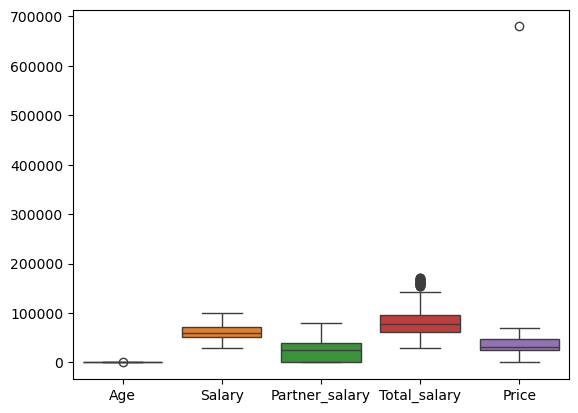

In [13]:
sns.boxplot(dataset)

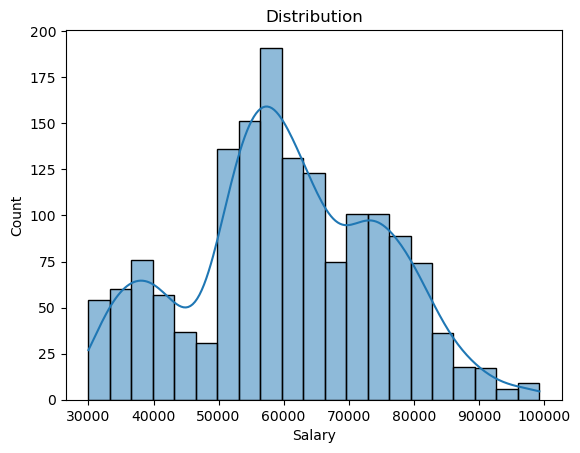

In [14]:
sns.histplot(dataset['Salary'],kde=True)
plt.title("Distribution")
plt.show()

In [15]:
print(dataset['Salary'].value_counts())

Salary
56400.0    11
52000.0    11
56000.0    10
58300.0    10
58700.0     9
           ..
83400.0     1
84200.0     1
95500.0     1
80700.0     1
31600.0     1
Name: count, Length: 535, dtype: int64


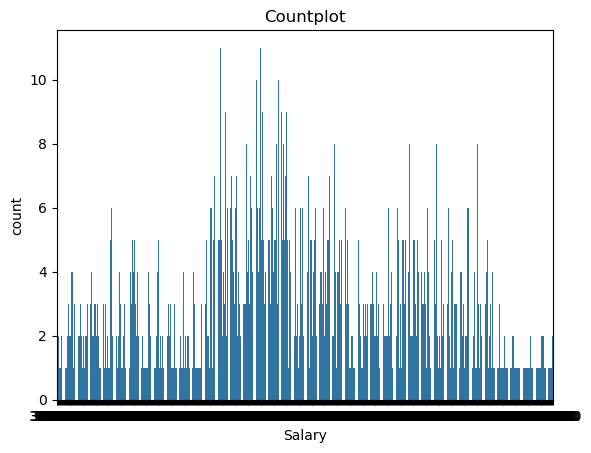

In [16]:
sns.countplot(x="Salary",data=dataset)
plt.title("Countplot")
plt.show()

In [17]:
correlation = dataset.corr(numeric_only=True)
print(correlation)


                     Age    Salary  Partner_salary  Total_salary     Price
Age             1.000000  0.605421        0.146870      0.466935  0.529550
Salary          0.605421  1.000000        0.088200      0.647453  0.287693
Partner_salary  0.146870  0.088200        1.000000      0.816346  0.119592
Total_salary    0.466935  0.647453        0.816346      1.000000  0.261950
Price           0.529550  0.287693        0.119592      0.261950  1.000000


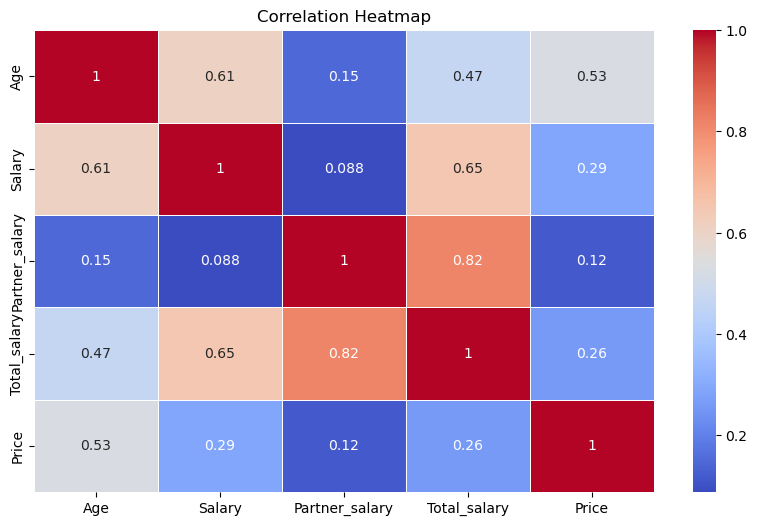

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

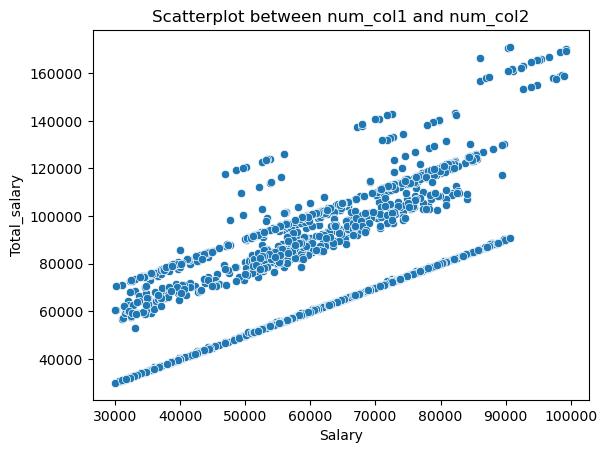

In [19]:
sns.scatterplot(x='Salary', y='Total_salary', data=dataset)
plt.title("Scatterplot between num_col1 and num_col2")
plt.show()

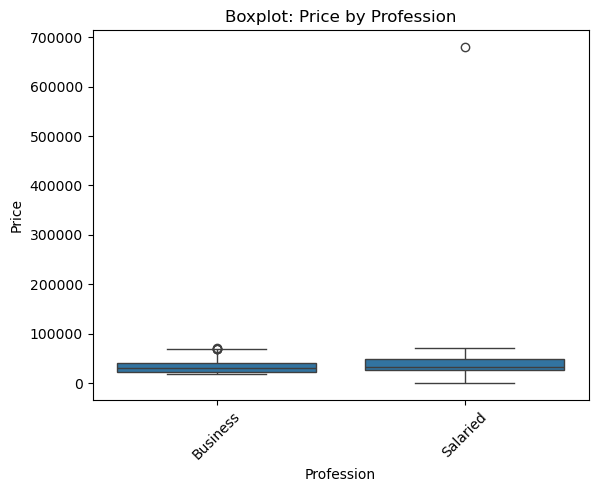

In [20]:
sns.boxplot(x='Profession', y='Price', data=dataset)
plt.title("Boxplot: Price by Profession")
plt.xticks(rotation=45)
plt.show()


In [21]:
initial_shape = dataset.shape
dataset.drop_duplicates(inplace=True)
print(f"Duplicates removed: {initial_shape[0] - dataset.shape[0]}")

Duplicates removed: 5


In [22]:
# Drop any unnamed columns (like 'Unnamed: 0' from CSVs)
dataset.drop(columns=[col for col in dataset.columns if 'unnamed' in col.lower()], inplace=True)

In [23]:
# Check null values
print("Null values before imputation:\n", dataset.isnull().sum())

# Fill nulls
dataset['Salary'].fillna(dataset['Salary'].median(), inplace=True)
dataset['Partner_salary'].fillna(0, inplace=True)  # Assuming 0 if no partner income

# Recalculate Total Salary if needed
dataset['Total_salary'] = dataset['Salary'] + dataset['Partner_salary']

# For categorical fields: fill with mode
categorical_cols = ['Gender', 'Profession', 'Marital_status', 'Education', 
                    'Personal_loan', 'House_loan', 'Partner_working']

for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

print("Null values after imputation:\n", dataset.isnull().sum())

Null values before imputation:
 Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64
Null values after imputation:
 Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


C:\Users\akilk\AppData\Local\Temp\ipykernel_29852\3724670459.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Salary'].fillna(dataset['Salary'].median(), inplace=True)
C:\Users\akilk\AppData\Local\Temp\ipykernel_29852\3724670459.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [24]:
# Strip spaces and fix case issues
for col in categorical_cols:
    dataset[col] = dataset[col].str.strip().str.title()

# Optional: fix specific known anomalies (e.g., Male/male/mALE to Male)
dataset['Gender'] = dataset['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [25]:
def remove_outliers_iqr(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataset[(dataset[column] >= lower) & (dataset[column] <= upper)]

# Apply on numeric columns
for col in ['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']:
    dataset = remove_outliers_iqr(dataset, col)

In [26]:
print("Final Data Types:\n", dataset.dtypes)
print("Final Shape of Cleaned Data:", dataset.shape)
print("Any remaining nulls:\n", dataset.isnull().sum())

Final Data Types:
 Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary        float64
Price                 int64
Make                 object
dtype: object
Final Shape of Cleaned Data: (1555, 14)
Any remaining nulls:
 Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


In [27]:
mean_age = dataset['Age'].mean()
median_age = dataset['Age'].median()
std_age = dataset['Age'].std()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age}")


Mean Age: 31.62443729903537
Median Age: 29.0
Standard Deviation of Age: 8.201714961083152


In [28]:
dataset['Gender'].replace({'Femal':'Female','Femle':'Female'},inplace=True)

C:\Users\akilk\AppData\Local\Temp\ipykernel_29852\3411532127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].replace({'Femal':'Female','Femle':'Female'},inplace=True)


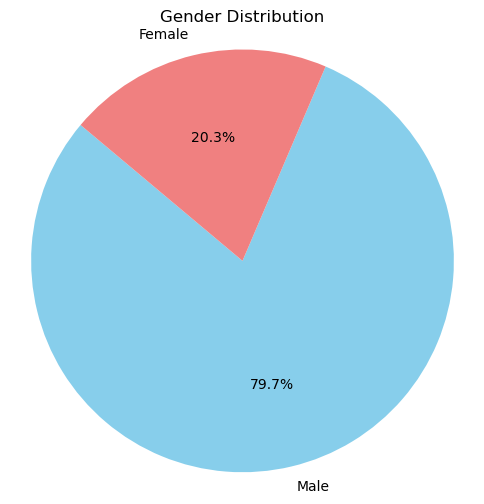

In [29]:
gender_counts = dataset['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Gender Distribution")
plt.axis('equal')  
plt.show()

In [30]:
correlation = dataset['Age'].corr(dataset['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")

# Interpretation
if correlation > 0.5:
    print("→ Strong positive correlation: Older individuals tend to have higher salaries.")
elif correlation > 0.3:
    print("→ Moderate positive correlation: Age somewhat increases with salary.")
elif correlation > 0:
    print("→ Weak positive correlation: Slight increase in salary with age.")
elif correlation < 0:
    print("→ Negative correlation: As age increases, salary decreases.")
else:
    print("→ No correlation between age and salary.")

Correlation between Age and Salary: 0.57
→ Strong positive correlation: Older individuals tend to have higher salaries.


In [31]:
average_salary_by_education = dataset.groupby('Education')['Salary'].mean()

print(average_salary_by_education)

Education
Graduate         48169.543147
Post Graduate    66792.064315
Name: Salary, dtype: float64


C:\Users\akilk\AppData\Local\Temp\ipykernel_29852\1723749768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Salary', data=dataset, estimator='mean', palette='Set2')


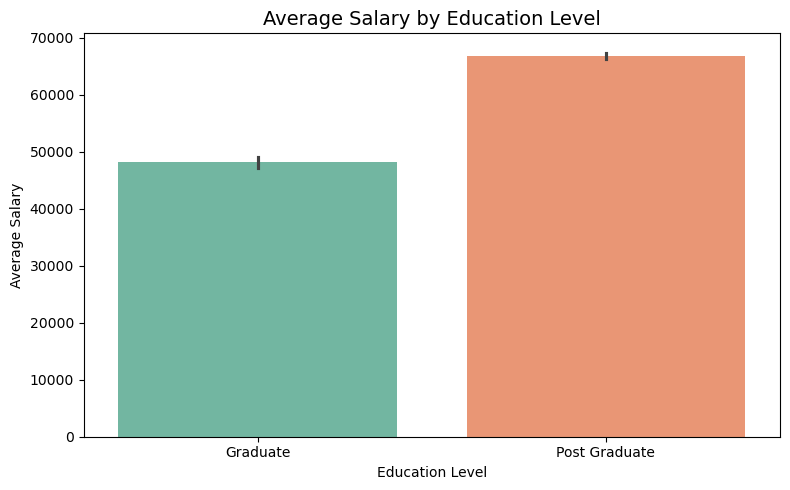

In [32]:
dataset['Education'] = dataset['Education'].str.strip().str.title()
plt.figure(figsize=(8,5))
sns.barplot(x='Education', y='Salary', data=dataset, estimator='mean', palette='Set2')
plt.title('Average Salary by Education Level', fontsize=14)
plt.ylabel('Average Salary')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
# Normalize Education column (if not done already)
dataset['Education'] = dataset['Education'].str.strip().str.title()

# Calculate average salary by Education
avg_salary = dataset.groupby('Education')['Salary'].mean()

graduate_salary = avg_salary.get('Graduate', np.nan)
postgraduate_salary = avg_salary.get('Post Graduate', np.nan)

percentage_increase = ((postgraduate_salary - graduate_salary) / graduate_salary) * 100

print(f"Average Salary for Graduates: {graduate_salary:.2f}")
print(f"Average Salary for Post Graduates: {postgraduate_salary:.2f}")
print(f"Post Graduates earn {percentage_increase:.2f}% more than Graduates on average.")


Average Salary for Graduates: 48169.54
Average Salary for Post Graduates: 66792.06
Post Graduates earn 38.66% more than Graduates on average.


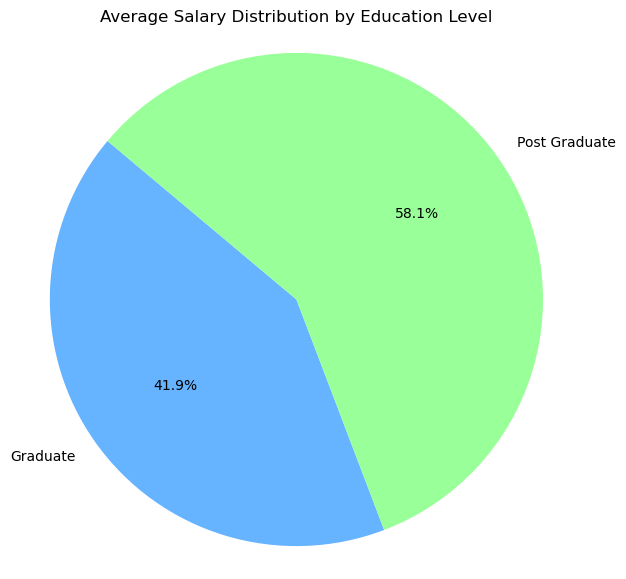

In [34]:
import matplotlib.pyplot as plt
labels = avg_salary.index
sizes = avg_salary.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Average Salary Distribution by Education Level')
plt.axis('equal') 

plt.show()

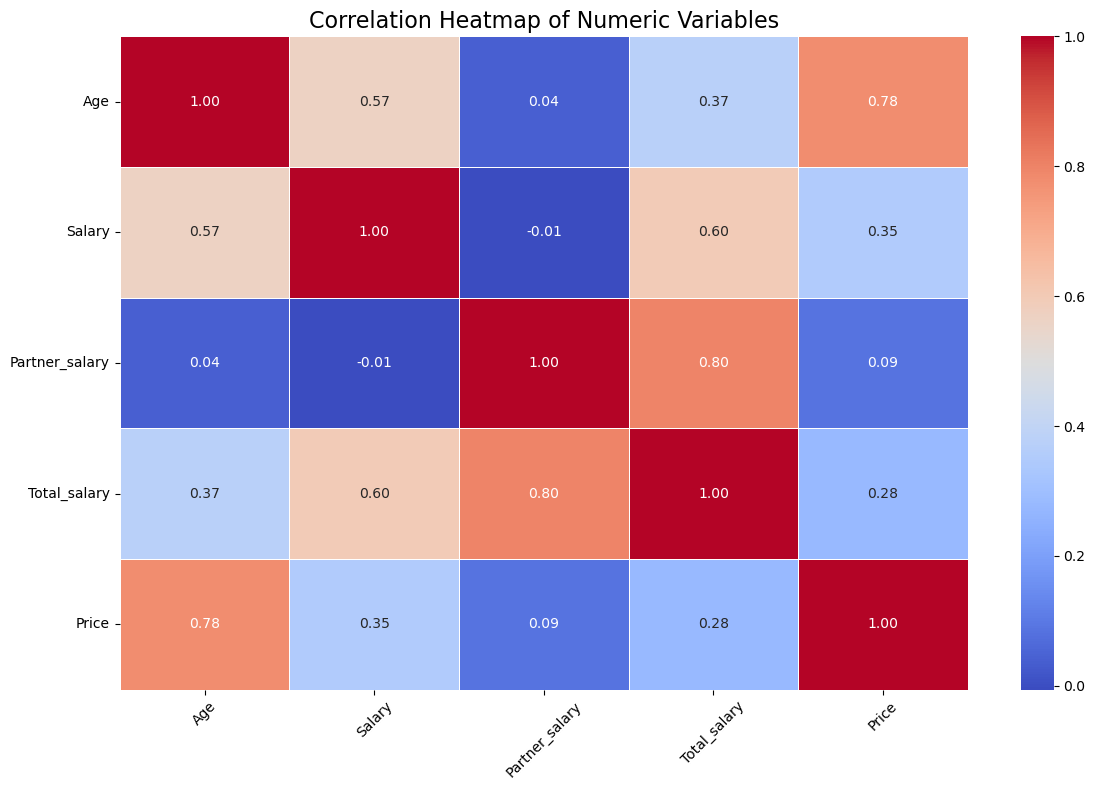

In [35]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
numeric_dataset = dataset[numeric_cols]

# Calculate correlation matrix
correlation_matrix = numeric_dataset.corr()

# Set the size and style of the plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title and adjust layout
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
loan_counts = dataset['Personal_loan'].value_counts(normalize=True) * 100
print(loan_counts)

Personal_loan
Yes    50.482315
No     49.517685
Name: proportion, dtype: float64


In [37]:
loan_by_gender = dataset.groupby(['Gender', 'Personal_loan']).size().unstack()
loan_by_gender_percent = loan_by_gender.div(loan_by_gender.sum(axis=1), axis=0) * 100
print(loan_by_gender_percent)

Personal_loan         No        Yes
Gender                             
Female         53.481013  46.518987
Male           48.506860  51.493140


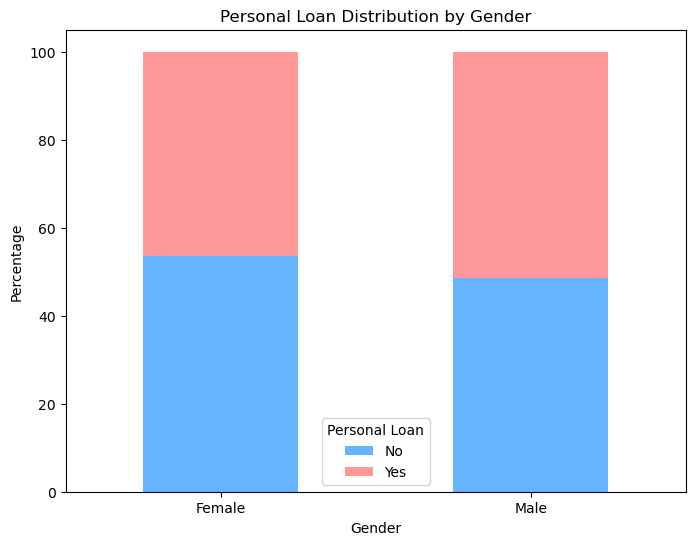

In [38]:
loan_by_gender_percent.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], figsize=(8, 6))
plt.title('Personal Loan Distribution by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan')
plt.show()

In [39]:
print(loan_by_gender_percent.columns)


Index(['No', 'Yes'], dtype='object', name='Personal_loan')


In [40]:
male_loan_pct = loan_by_gender_percent.loc['Male', 'Yes']
female_loan_pct = loan_by_gender_percent.loc['Female', 'Yes']


In [41]:
# Calculate percentage distribution of Personal Loan by Gender
loan_by_gender_percent = dataset.groupby(['Gender', 'Personal_loan']).size().unstack()
loan_by_gender_percent = loan_by_gender_percent.div(loan_by_gender_percent.sum(axis=1), axis=0) * 100

# Extract loan % values correctly using string labels
male_loan_pct = loan_by_gender_percent.loc['Male', 'Yes']
female_loan_pct = loan_by_gender_percent.loc['Female', 'Yes']

# Compute difference
difference = male_loan_pct - female_loan_pct

# Count individuals by gender
gender_counts = dataset['Gender'].value_counts()

# Output
print(f"Total Males: {gender_counts.get('Male', 0)}")
print(f"Total Females: {gender_counts.get('Female', 0)}")
print(f"\nPercentage of Males with Personal Loan: {male_loan_pct:.2f}%")
print(f"Percentage of Females with Personal Loan: {female_loan_pct:.2f}%")



Total Males: 1239
Total Females: 316

Percentage of Males with Personal Loan: 51.49%
Percentage of Females with Personal Loan: 46.52%


In [42]:
print(dataset.columns)



Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')


In [43]:
dataset['No_of_Dependents'] = pd.to_numeric(dataset['No_of_Dependents'], errors='coerce')


In [44]:
print(dataset['No_of_Dependents'].isna().sum())


2


In [45]:
# Calculate average number of dependents grouped by marital status
avg_dependents_by_marital_status = dataset.groupby('Marital_status')['No_of_Dependents'].mean()

# Output
print("Average Number of Dependents:")
print(f"Married: {avg_dependents_by_marital_status.get('Married', 0):.2f}")
print(f"Single: {avg_dependents_by_marital_status.get('Single', 0):.2f}")


Average Number of Dependents:
Married: 2.53
Single: 1.61


In [46]:
# Group by partner's employment status and calculate average total salary
avg_total_salary_by_partner_status = dataset.groupby('Partner_working')['Total_salary'].mean()

# Output
print("Average Total Salary based on Partner's Employment Status:")
print(f"Partner Working: {avg_total_salary_by_partner_status.get('Yes', 0):.2f}")
print(f"Partner Not Working: {avg_total_salary_by_partner_status.get('No', 0):.2f}")


Average Total Salary based on Partner's Employment Status:
Partner Working: 92631.95
Partner Not Working: 60256.45


In [47]:
# Group by partner's employment status and calculate average individual's salary
avg_salary_by_partner_status = dataset.groupby('Partner_working')['Salary'].mean()

# Output
print("Average Individual Salary based on Partner's Employment Status:")
print(f"Partner Working: {avg_salary_by_partner_status.get('Yes', 0):.2f}")
print(f"Partner Not Working: {avg_salary_by_partner_status.get('No', 0):.2f}")


Average Individual Salary based on Partner's Employment Status:
Partner Working: 59255.23
Partner Not Working: 60256.45


In [48]:
avg_total_salary_by_partner_status = dataset.groupby('Partner_working')['Total_salary'].mean()
print(avg_total_salary_by_partner_status.round(2))

Partner_working
No     60256.45
Yes    92631.95
Name: Total_salary, dtype: float64


In [49]:
avg_partner_salary_by_house_loan = dataset.groupby('House_loan')['Partner_salary'].mean()
print(avg_partner_salary_by_house_loan.round(2))

House_loan
No     18010.21
Yes    18194.88
Name: Partner_salary, dtype: float64
